In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os

In [2]:
import tarfile
import urllib

In [3]:
from google.colab import files
uploaded = files.upload()

Saving 2 variant.csv to 2 variant (1).csv


In [4]:
data = pd.read_csv('2 variant.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
%matplotlib inline

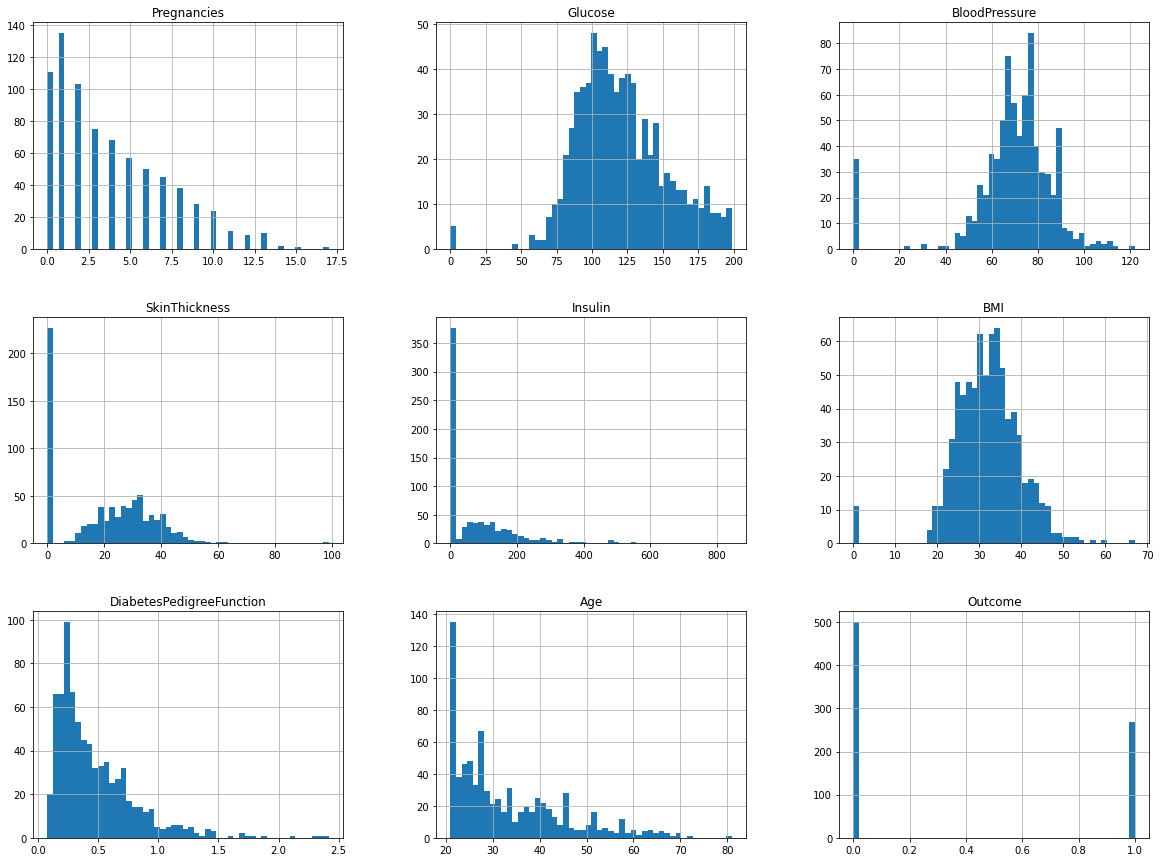

In [8]:
data.hist(bins=50,figsize=(20,15))
plt.show();

In [9]:
print("Diabetes percent", ((data.Outcome == 1).sum())/len(data)*100)
print("Median Age level:", data["Age"].min(),data["Age"].max() )
print("Median diabetes pedigree function:", data["DiabetesPedigreeFunction"].min(),data["DiabetesPedigreeFunction"].max() )

Diabetes percent 34.89583333333333
Median Age level: 21 81
Median diabetes pedigree function: 0.078 2.42


Случайная выборка:

In [10]:
from sklearn.model_selection import train_test_split

# train_test_split разбивает несколько наборов с одинаковым числом строк по одинаковым индексам
train_set,test_set = train_test_split(data,test_size = 0.2,random_state = 42 )

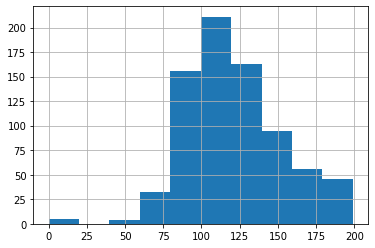

In [11]:
data['Glucose'].hist();

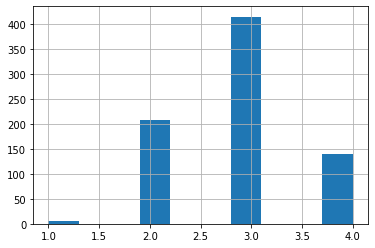

In [12]:
data['glucose_category'] = pd.cut(data['Glucose'],bins=[-0.5,50,100,150,201,  np.inf],labels=[1,2,3,4,5])
data.glucose_category.hist();

Стратификационная выборка:

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
# или train_test_split с параметром stratify
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2, random_state=42)
for train_index, test_index in split.split(data,data['glucose_category']):
    print(train_index)
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

[566 703  73  46 643   5 113 380  23 739 545 333 220 175  89 355 185  83
 578 396 212 348 495 217 697  13 710 670 117 201 424 238 627 471 467  97
 211 138  44 760 491 372 646 248 519 651  96 561 652 162 730  24 350  37
 187  22 208 698 384 603 589 648 297 224 549 137  60 727 722 307 573  99
 126 249 368 352 764 656 475  68 407 340 752 392 430 620 587 526 679 320
 284 493 409 128 745 315 281 440 624  80 147 686 669 594 262 449 618 546
 680 749 435 662 748  27 114 682 577 676 413 683 257 376 758 168 462 487
 165 459 436 156 447 734 461 378 513 664 169 109 714 718 499 272  75 533
 264 560 401 498 383 607  15 765 639 339 269 337 590 360 452 701  85  48
 316  91 381  79 154 332 456 500 492 252 369  92 254 548 759 241 524 142
 336 136 450 438 568 308 412 694 118 509 755 215 625  88 311 366  40 247
 387 233 386  94  59 314 520 290 188 133 540 153  19 515 173 106 178 599
 414 591 382 632 481 371 512 580  25 693 455 630  42 190 628 388 232  45
 319 555 334 706  98 593 189  31  72 539 200 433 12

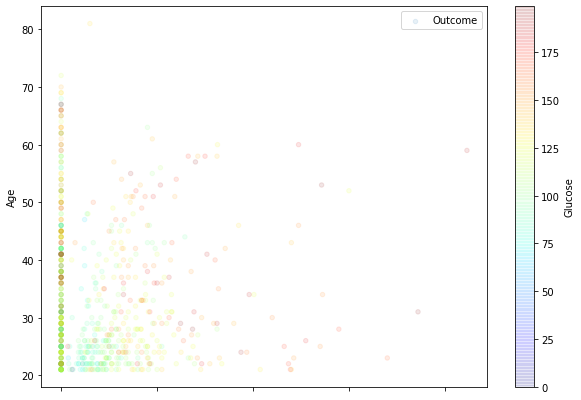

In [14]:
data.plot(kind="scatter",x="Insulin",y = "Age",alpha = 0.1,label="Outcome",figsize=(10,7),c="Glucose",cmap = plt.get_cmap("jet"),colorbar=True)
plt.legend()

Из анализа вытекает, что уровень глюкозы в крови зависит от содержащегося в крови инсулина, возраста пациента и подтвержденного диагноза "Диабет"

Вычислим коэффициент корреляции Пирсона для выявления линейных связей:

In [15]:
corr_matrix = data.corr()
corr_matrix['Glucose'].sort_values(ascending=False)

Glucose                     1.000000
Outcome                     0.466581
Insulin                     0.331357
Age                         0.263514
BMI                         0.221071
BloodPressure               0.152590
DiabetesPedigreeFunction    0.137337
Pregnancies                 0.129459
SkinThickness               0.057328
Name: Glucose, dtype: float64

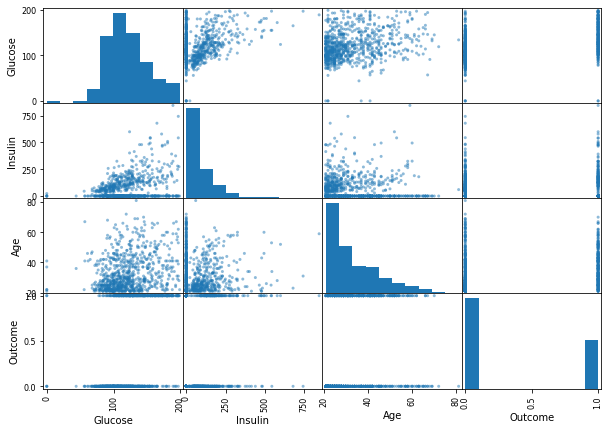

In [16]:
from pandas.plotting import scatter_matrix

attributes = ["Glucose", "Insulin", "Age", "Outcome"]
scatter_matrix(data[attributes],figsize=(10,7));

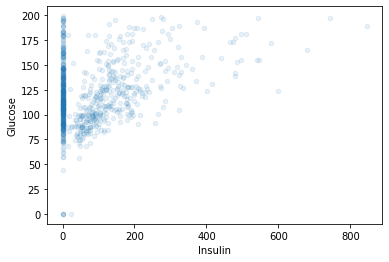

In [17]:
data.plot(kind='scatter',x='Insulin',y='Glucose',alpha=0.1)

На данном графике видна средняя корреляция между уровнем глюкозы и инсулина в крови. К тому же, заметна ярко выраженная линия около x=0, что свидетельствует об особенностях в данных

In [18]:
data['Insulin/Glucose'] = data['Insulin'] / data['Glucose']
data['Outcome/Glucose'] = data['Outcome'] / data['Glucose']
data['Glucose/Age'] = data['Glucose'] / data['Age']

In [19]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,glucose_category,Insulin/Glucose,Outcome/Glucose,Glucose/Age
0,6,148,72,35,0,33.6,0.627,50,1,3,0.000000,0.006757,2.960000
1,1,85,66,29,0,26.6,0.351,31,0,2,0.000000,0.000000,2.741935
2,8,183,64,0,0,23.3,0.672,32,1,4,0.000000,0.005464,5.718750
3,1,89,66,23,94,28.1,0.167,21,0,2,1.056180,0.000000,4.238095
4,0,137,40,35,168,43.1,2.288,33,1,3,1.226277,0.007299,4.151515
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,3,1.782178,0.000000,1.603175
764,2,122,70,27,0,36.8,0.340,27,0,3,0.000000,0.000000,4.518519
765,5,121,72,23,112,26.2,0.245,30,0,3,0.925620,0.000000,4.033333
766,1,126,60,0,0,30.1,0.349,47,1,3,0.000000,0.007937,2.680851


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    int64   
 2   BloodPressure             768 non-null    int64   
 3   SkinThickness             768 non-null    int64   
 4   Insulin                   768 non-null    int64   
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    int64   
 9   glucose_category          768 non-null    category
 10  Insulin/Glucose           764 non-null    float64 
 11  Outcome/Glucose           765 non-null    float64 
 12  Glucose/Age               768 non-null    float64 
dtypes: category(1), float64(5), int64(7)
memory usage:

In [21]:
corr_matrix = data.corr()
corr_matrix['Glucose'].sort_values(ascending=False)

Glucose                     1.000000
Glucose/Age                 0.513461
Outcome                     0.466581
Insulin                     0.331357
Outcome/Glucose             0.331029
Age                         0.263514
BMI                         0.221071
Insulin/Glucose             0.183046
BloodPressure               0.152590
DiabetesPedigreeFunction    0.137337
Pregnancies                 0.129459
SkinThickness               0.057328
Name: Glucose, dtype: float64

In [22]:
needed_features = ['Glucose/Age','Outcome','Insulin','Outcome/Glucose','Age', 'BMI']

In [23]:
data = strat_train_set.drop('Glucose',axis=1)
diabetes_labels = strat_train_set['Glucose'].copy()